In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

Example of loading a dataset from the file datasets.txt:

In [83]:
datasets = open("datasets.txt","r")
datasets = datasets.read().splitlines()
# remove blank lines
for line in datasets:
    if line=='':
        datasets.remove(line)
length = str(len(datasets))
select_dataset = int(input("Please select a dataset 1 - " + length +":"))
raw_current_dataset = datasets[select_dataset-1].split(",")
raw_current_dataset.pop(len(raw_current_dataset)-1)
current_dataset = [float(val) for val in raw_current_dataset]
current_dataset

[-0.17882228638825798,
 20.0,
 -0.1891494539210154,
 24.663,
 -0.19494015751508026,
 29.337,
 -0.19923795565750854,
 34.0,
 -0.20212536409083054,
 38.663,
 -0.20457955845610046,
 43.337,
 -0.20645840085227152,
 48.0,
 -0.2078647440203918,
 52.663,
 -0.20906043555966375,
 57.337,
 -0.2100522426589713,
 62.0,
 -0.2112978643184916,
 66.663,
 -0.2121558873899502,
 71.337,
 -0.21274591952492397,
 76.0,
 -0.213214755346381,
 80.663,
 -0.21390907068008808,
 85.337]

Split data into 2 separate lists:

In [84]:
distance, entropy = [], []
for i in range(len(current_dataset)):
    if i == 0 or i%2 == 0:
        entropy.append(current_dataset[i])
    else:
        distance.append(current_dataset[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

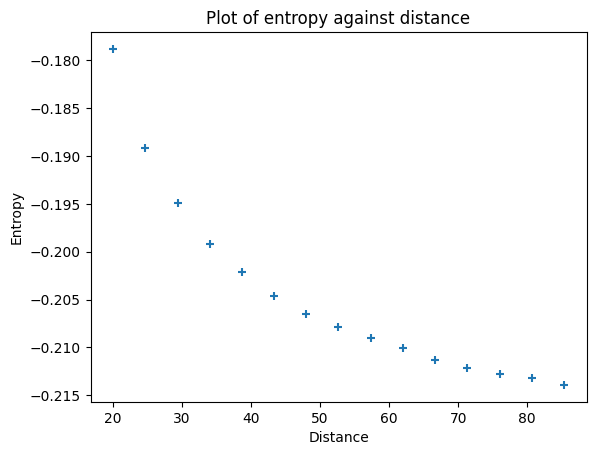

In [85]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Standard deviation for analysing noise data:

In [86]:
print(np.std(entropy))

0.009741834856491868


Text(0, 0.5, 'log(standard deviation)')

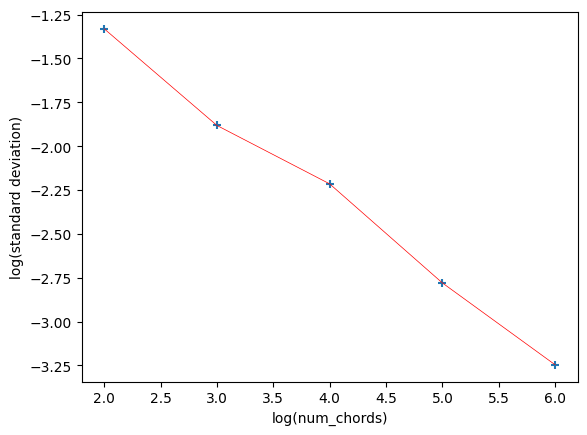

In [87]:
with open("vary_num_chords_noise.txt") as noise_data:
    noise_data_list = noise_data.read().splitlines()
noise_x,noise_y = [],[]
for val in noise_data_list:
    noise_x.append(np.log10(int(val.split(",")[1])))
    noise_y.append(np.log10(float(val.split(",")[0])))

plt.scatter(noise_x,noise_y,marker='+')
plt.plot(noise_x,noise_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(standard deviation)")

Fit a curve to the data:

In [88]:
x_values,y_values = [],[]
for i in range(0,len(current_dataset),2):
    x_values.append(current_dataset[i+1])
    y_values.append(current_dataset[i])

In [89]:
p = np.polyfit(x_values,y_values,3)
p

array([-2.54572157e-07,  5.05352304e-05, -3.45705384e-03, -1.29479390e-01])

Text(0.5, 1.0, 'Fitting a polynomial curve')

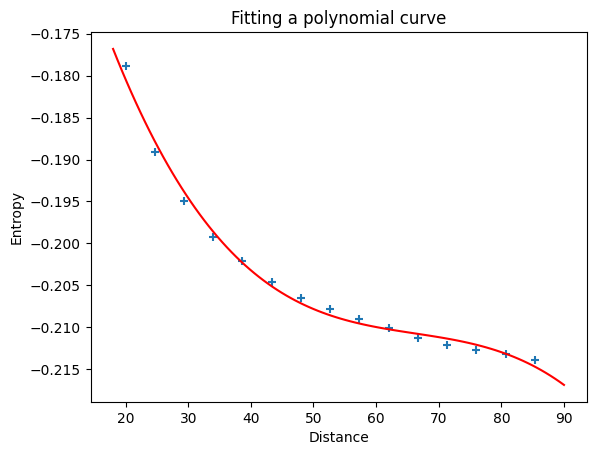

In [90]:
x = np.linspace(18,90,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [91]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 1.71091771, -1.24286894, -0.22048025])

Text(0.5, 1.0, 'Fitting an exponential curve')

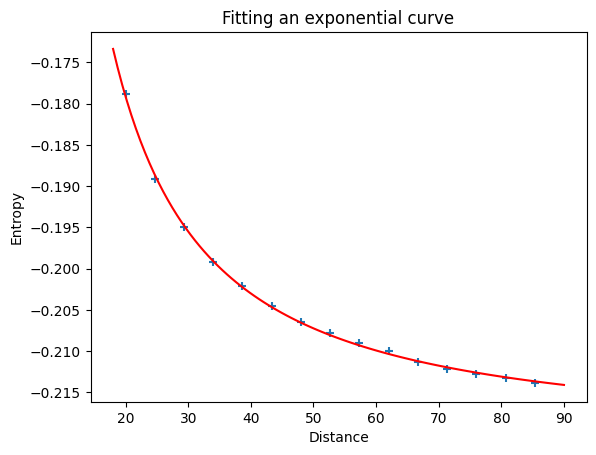

In [92]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and plot:

In [93]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    if dS/dx < 0:
        gradient_vals.append((dS/dx,x))

gradient_vals

[(-0.0022147045963451465, 22.3315),
 (-0.001238918184438353, 27.0),
 (-0.0009216809226738758, 31.6685),
 (-0.0006192169061381084, 36.3315),
 (-0.0005250736767800417, 41.0),
 (-0.00040292566934828675, 45.6685),
 (-0.0003015962187690914, 50.3315),
 (-0.0002558176164467175, 55.0),
 (-0.00021269721194671807, 59.6685),
 (-0.0002671288139653233, 64.3315),
 (-0.0001835736139192557, 69.0),
 (-0.0001265348777554735, 73.6685),
 (-0.00010054381759747853, 78.3315),
 (-0.00014854842398525072, 83.0)]

Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

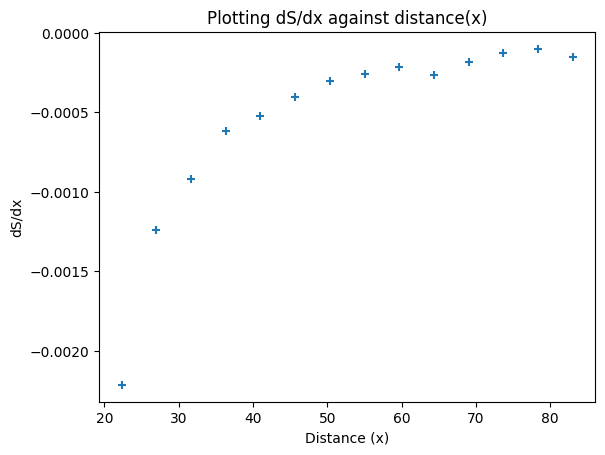

In [94]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])
#grad_xs.pop(0)
#grad_ys.pop(0)
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

Fit a curve to the gradient data:

a = 0.00044799658383324584 
b = -21.85748669712631 
c = -0.0018857946423831002


C:\Users\Josh\AppData\Local\Temp\ipykernel_17440\379707339.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(x+b) + c
C:\Users\Josh\AppData\Local\Temp\ipykernel_17440\379707339.py:9: RuntimeWarning: invalid value encountered in log
  y3 = (p3[0] * np.log(x+p3[1])) + p3[2]


Text(0.5, 1.0, 'Fitting a log curve to the data')

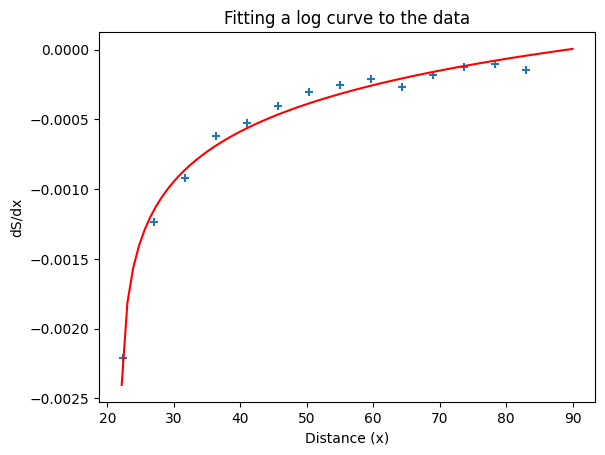

In [95]:
def f(x, a, b, c):
    return a * np.log(x+b) + c

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.001,-5,-0.005))[0]
print("a =",p3[0],"\nb =",p3[1],"\nc =",p3[2])

x = np.linspace(5,90,100)

y3 = (p3[0] * np.log(x+p3[1])) + p3[2]

plt.plot(x,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

Draw a ln-ln plot of the data (should be a straight line, negative gradient):

In [96]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

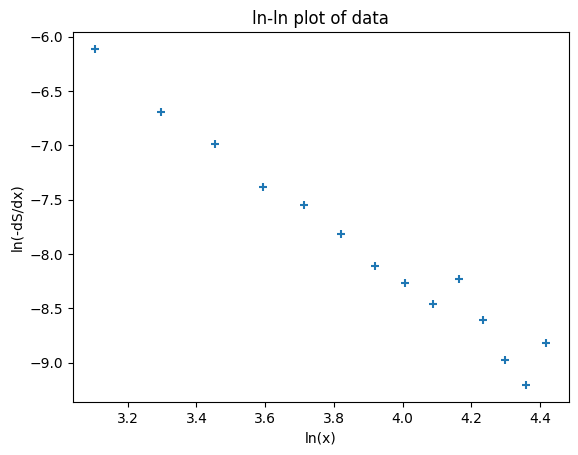

In [97]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("ln-ln plot of data")

In [98]:
# could remove outliers here
#neg_log_grads.pop()
#log_xs.pop()

p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.16728485,  0.4898487 ])

Text(0.5, 1.0, 'Plotting linear LOBF')

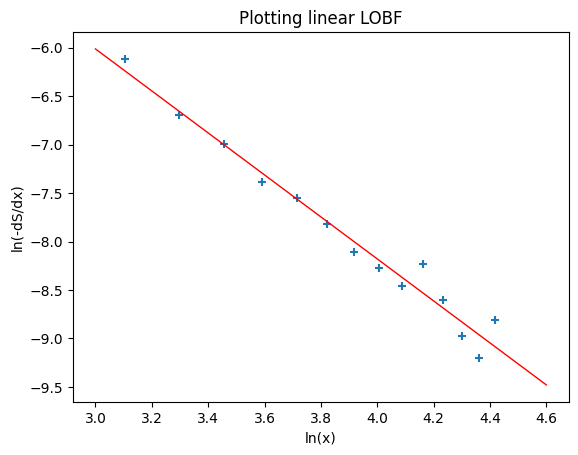

In [99]:
x = np.linspace(3.0,4.6,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red",linewidth=1)
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [100]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.167284848


In [101]:
power_law_vals = [2.231302622,2.266290271,2.235383985,2.242973826,2.223421966,
                  2.312340685,2.315022577,2.170966076,2.45587869,2.288346225,
                  2.391869278,2.143569017,2.402779246,2.167284848,2.212925996]
sd = np.std(power_law_vals)
mean = np.mean(power_law_vals)
no_outliers = []
for val in power_law_vals:
    if not(val <= mean - 1.5*sd or val >= mean + 1.5*sd):
        no_outliers.append(val)
print(mean)
print(np.mean(no_outliers))

2.270690353866667
2.2574626155714292


Plot relationship between number of chords and time taken to generate:

Text(0.5, 1.0, 'Log-log relationship between num_chords and time to simulate')

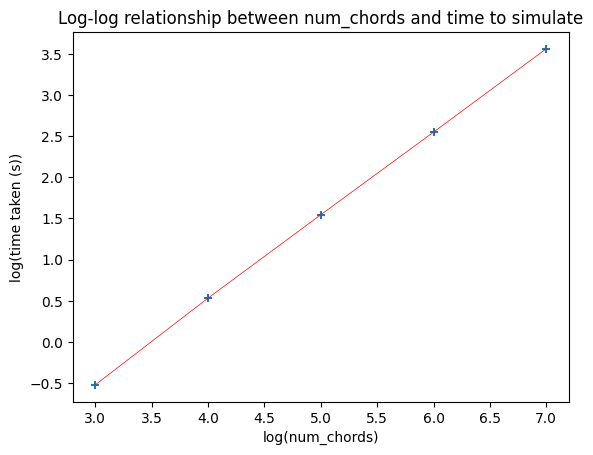

In [102]:
with open("vary_num_chords.txt") as chords_data:
    chords_data_list = chords_data.read().splitlines()
chords_x,chords_y = [],[]
for val in chords_data_list:
    chords_x.append(np.log10(int(val.split(",")[0])))
    chords_y.append(np.log10(float(val.split(",")[1])))

plt.scatter(chords_x,chords_y,marker="+")
plt.plot(chords_x,chords_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(time taken (s))")
plt.title("Log-log relationship between num_chords and time to simulate")

# Finding final result and standard deviation for all datasets:

In [103]:
final_vals = []
entropy_vals = []
for line in datasets:
    vals_to_add = []
    # make a list of lists of entropy values for all datasets
    raw_dataset = line.split(",")
    raw_dataset.pop(len(raw_dataset)-1)
    current_dataset = [float(val) for val in raw_dataset]
    for i in range(len(current_dataset)):
        if i == 0 or i%2 == 0:
            vals_to_add.append(current_dataset[i])
    entropy_vals.append(vals_to_add)
    
# calculate list of dS/dx values for each dataset
distances = [22.3315,27.0,31.6685,36.3315,41.0,45.6685,50.3315,55.0,59.6685,64.3315,69.0,73.6685,78.3315,83.0]
gradient_vals2 = []
for lst in entropy_vals:
    vals_to_add_grad = []
    for i in range(len(lst)-1):
        dS = lst[i+1] - lst[i]
        dx = distance[i+1] - distance[i]
        x = distance[i] + dx/2
        if dS/dx < 0:
            vals_to_add_grad.append((dS/dx,x))
    gradient_vals2.append(vals_to_add_grad)
gradient_vals2[0]

neg_log_grads = []
log_xs = []

for lst in gradient_vals2:
    vals_to_add_ys = []
    vals_to_add_xs = []
    for point in lst:
        vals_to_add_ys.append(np.log(-1 * point[0]))
        vals_to_add_xs.append(np.log(point[1]))
    neg_log_grads.append(vals_to_add_ys)
    log_xs.append(vals_to_add_xs)

total_grads = 0
for i in range(len(log_xs)):
    pFinal = np.polyfit(log_xs[i],neg_log_grads[i],1)
    total_grads += pFinal[0]

final_value = total_grads*(-1/len(log_xs))
print("The average value for the power law is %f"%final_value)

entropy_stds = []
for lst in entropy_vals:
    entropy_stds.append(np.std(lst))

avg_std = np.sum(entropy_stds)/len(entropy_stds)

print("\nThe average standard deviation for the datasets is %f"%avg_std)

The average value for the power law is 2.270690

The average standard deviation for the datasets is 0.009737
